# 3. Análisis de libreria (B) y Sklearn

## Carga de librerias

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

## Análisis de las bases de datos

In [65]:
df_red = pd.read_csv('datos/winequality-red.csv', delimiter=';')
df_white = pd.read_csv('datos/winequality-white.csv', delimiter=';')

### Aplicación de la función ``df.describe()``

In [66]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [67]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Aplicación de la función ``df.info()``

In [68]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [69]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No hay valores nulos o NaN

### Análisis de los targets (Wine Quality)

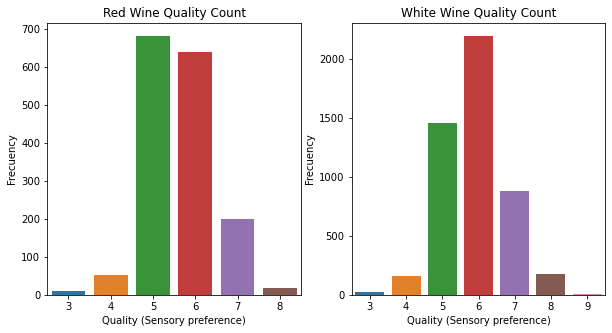

In [70]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.countplot(x = df_red['quality'])
plt.title('Red Wine Quality Count')
plt.ylabel('Frecuency')
plt.xlabel('Quality (Sensory preference)')
plt.subplot(1, 2, 2)
sns.countplot(x = df_white['quality'])
plt.title('White Wine Quality Count')
plt.ylabel('Frecuency')
plt.xlabel('Quality (Sensory preference)')
plt.show()

### Aplicación de la función ``df.corr()`` y graficado

In [71]:
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [72]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


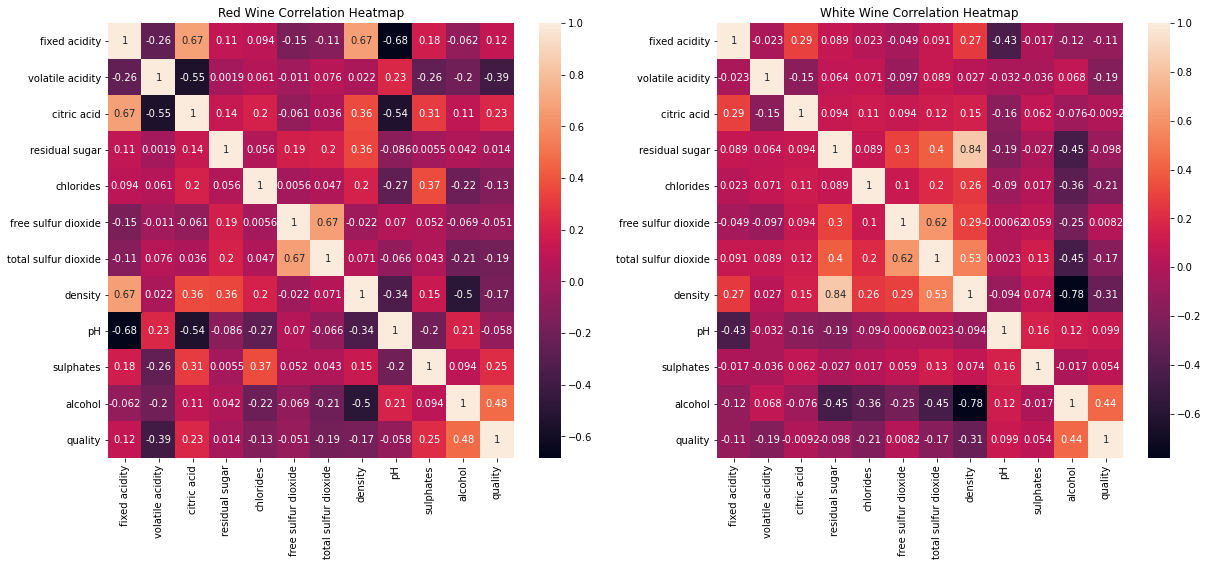

In [73]:
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
sns.heatmap(df_red.corr(), annot=True)
plt.title('Red Wine Correlation Heatmap')
plt.subplot(1, 2, 2)
sns.heatmap(df_white.corr(), annot=True)
plt.title('White Wine Correlation Heatmap')
plt.show()

### Análisis de los features

In [74]:
red_desc = df_red.describe().loc[['min', 'max', 'mean', 'std']].transpose().drop('quality')
white_desc = df_white.describe().loc[['min', 'max', 'mean', 'std']].transpose().drop('quality')
df_desc = pd.concat([red_desc, white_desc], axis = 1)

In [75]:
from IPython.display import HTML, display_html, display
display(HTML('<h4>Estadísticas por tipo de vino</h4>'))
display(HTML('<h5>Red whine data statistics / White whine data statistics</h5>'))
display_html(df_desc.round(2))

,min,max,mean,std,min,max,mean,std
fixed acidity,4.60,15.90,8.32,1.74,3.80,14.20,6.85,0.84
volatile acidity,0.12,1.58,0.53,0.18,0.08,1.10,0.28,0.10
citric acid,0.00,1.00,0.27,0.19,0.00,1.66,0.33,0.12
residual sugar,0.90,15.50,2.54,1.41,0.60,65.80,6.39,5.07
chlorides,0.01,0.61,0.09,0.05,0.01,0.35,0.05,0.02
free sulfur dioxide,1.00,72.00,15.87,10.46,2.00,289.00,35.31,17.01
total sulfur dioxide,6.00,289.00,46.47,32.90,9.00,440.00,138.36,42.50
density,0.99,1.00,1.00,0.00,0.99,1.04,0.99,0.00
pH,2.74,4.01,3.31,0.15,2.72,3.82,3.19,0.15
sulphates,0.33,2.00,0.66,0.17,0.22,1.08,0.49,0.11


## Aplicación con SKlearn para cada base de datos

### Creacion de los DataFrame de Features y normalizandolos de 0 a 1 con la función  ``MinMaxScaler()`` de sklearn

In [89]:
X_red = df_red.drop(['quality'], axis=1)
X_white = df_white.drop(['quality'], axis=1)
X_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [90]:
scaler = MinMaxScaler()
x_red_columns = X_red.columns
x_white_columns = X_white.columns
for columna in x_red_columns:
    X_red[columna] = scaler.fit_transform(np.c_[X_red[columna]].reshape(-1, 1))

for columna in x_white_columns:
    X_white[columna] = scaler.fit_transform(np.c_[X_white[columna]].reshape(-1, 1))

In [91]:
X_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385


In [92]:
X_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710


### Creación de los DataFrames de Targets y normalizándolos

In [93]:
Y_red = df_red['quality']
Y_white = df_white['quality']

Y_red = scaler.fit_transform(np.c_[Y_red].reshape(-1, 1))
Y_white = scaler.fit_transform(np.c_[Y_white].reshape(-1, 1))

Y_red

Y_white

### Modelos con SKlearn

#### Red wine quality prediction model

In [113]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(X_red, Y_red, test_size = 0.20, random_state = 42)

In [125]:
clf = SGDClassifier(loss='hinge', penalty="l2", max_iter=1000)
clf.fit(x_train_r, y_train_r)
# print(f'Bias: \n{clf.intercept_}')
# print(f'Weights: \n{clf.coef_}')

SGDClassifier()

In [126]:
predictions_red = clf.decision_function(x_test_r)
predictions_red

array([[-3.35923037, -1.37646758,  0.49306337, -0.60330819, -2.5108382 ,
        -1.98300915],
       [-3.70764751, -1.36505351,  1.49211966, -1.27533995, -3.10089243,
        -2.26772583],
       [-2.69781273, -1.44717919, -0.91887879,  0.31776298, -1.7375196 ,
        -1.83386422],
       ...,
       [-3.25981342, -1.26880639,  0.63446637, -0.94857708, -2.55518603,
        -1.79152867],
       [-4.24674251, -1.4738088 , -2.08825475,  1.07116821, -0.84764055,
        -1.44753468],
       [-2.4975366 , -1.32946117,  0.44439466, -0.76049042, -2.66101548,
        -1.79759337]])

model_red = LinearRegression()
model_red.fit(x_train_r, y_train_r)
print(f'Bias: \n{model_red.intercept_}')
print(f'Weights: \n{model_red.coef_}')

predictions_red = model_red.predict(x_test_r).round()

In [127]:
precision_red = model_red.score(x_test_r, y_test_r)
precision

0.4031803412796231

# y_test_r = scaler.inverse_transform(y_test_r)
# predictions_red = scaler.inverse_transform(predictions_red)
print(f'MAE: {metrics.mean_absolute_error(y_test_r, predictions_red)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_r, predictions_red)}')

ValueError: x and y must be the same size

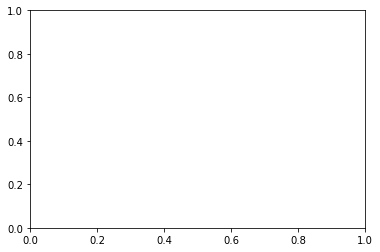

In [128]:
plt.scatter(predictions_red, y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Data test')
plt.show()

#### White wine quiality prediction model

In [20]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_white, Y_white, test_size = 0.20, random_state = 42)

In [21]:
model_white = LinearRegression()
model_white.fit(x_train_w, y_train_w)
print(f'Bias: \n{model_white.intercept_}')
print(f'Weights: \n{model_white.coef_}')

Bias: 
124.39391498452218
Weights: 
[ 4.59072370e-02 -1.91488432e+00 -6.13034698e-02  7.12395507e-02
 -2.64751329e-02  5.11945372e-03 -2.42153962e-04 -1.24264125e+02
  6.00699854e-01  6.49072780e-01  2.29008684e-01]


In [22]:
predictions_white = model_white.predict(x_test_w)

In [23]:
print(f'MAE: {metrics.mean_absolute_error(y_test_w, predictions_white)}')
print(f' MAPE: {metrics.mean_absolute_percentage_error(y_test_w, predictions_white)}')

MAE: 0.5862665383250465
 MAPE: 0.10326059402220482


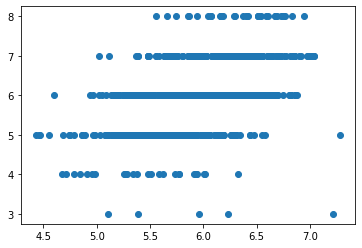

In [24]:
plt.scatter(predictions_white, y_test_w)
plt.show()

## Aplicación con SKlearn para las bases en conjunto

In [25]:
df_red = pd.read_csv('datos/winequality-red.csv', delimiter=';')
df_white = pd.read_csv('datos/winequality-white.csv', delimiter=';')

In [26]:
df_red['Type'] = 'red'
df_white['Type'] = 'white'

In [27]:
df = pd.concat([df_red, df_white], ignore_index=True)

In [28]:
tipo = pd.get_dummies(df['Type'])

In [29]:
# Nuevo data frame con ambos archivos
df['Type_'] = tipo['red']
df = df.drop(['Type'], axis=1)

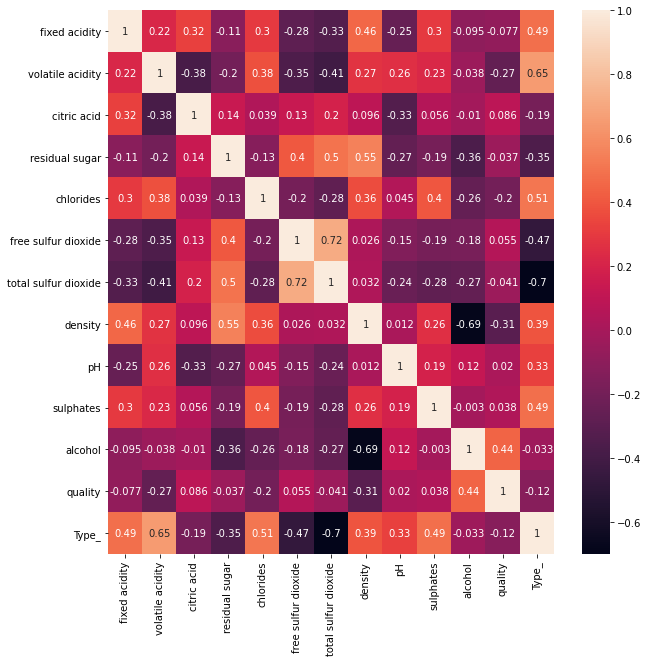

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

102.30359185682539
[ 9.21330302e-02 -1.50880993e+00 -9.78878286e-02  6.28216515e-02
 -5.82631627e-01  5.97790423e-03 -1.63243044e-03 -1.02081690e+02
  5.27633123e-01  7.63015400e-01  2.32593705e-01  3.35208372e-01]


In [34]:
predictions = model.predict(x_test)

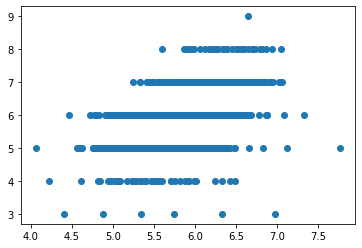

In [35]:
plt.scatter(predictions, y_test)
plt.show()

In [36]:
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test, predictions)}')

MAE: 0.5644129055666045
MAPE: 0.10046820931510131


In [145]:
from sklearn import svm
# Always scale the input. The most convenient way is to use a pipeline.
clf = svm.SVC()
clf.fit(x_train_r, y_train_r)
#Pipeline(steps=[('standardscaler', StandardScaler()), ('sgdclassifier', SGDClassifier())])
predictions = clf.predict(x_test_r)

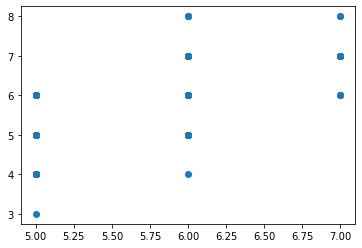

In [146]:
plt.scatter(predictions, y_test_r)
plt.show()

In [147]:
print(f'MAE: {metrics.mean_absolute_error(y_test_r, predictions)}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_r, predictions)}')

MAE: 0.421875
 MAPE: 0.07377232142857143


In [148]:
precision_red = clf.score(x_test_r, y_test_r)
precision

0.4031803412796231